# Pillow

## Opening and viewing image

In [1]:
# importing pillow library
from PIL import Image

In [2]:
# .open() to load images inside python variables
img = Image.open("testimage.jpg")

In [3]:
print(img)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=812x457 at 0x205BEC1D950>


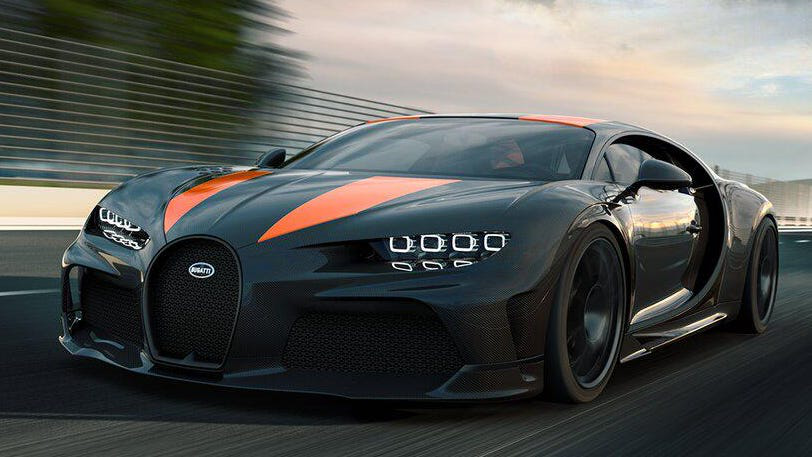

In [4]:
img

## Getting information about the image

In [5]:
img.filename

'testimage.jpg'

In [6]:
img.format

'JPEG'

In [7]:
img.mode

'RGB'

In [8]:
img.size

(812, 457)

In [9]:
img.width

812

In [10]:
img.height

457

## Rotate and Resize

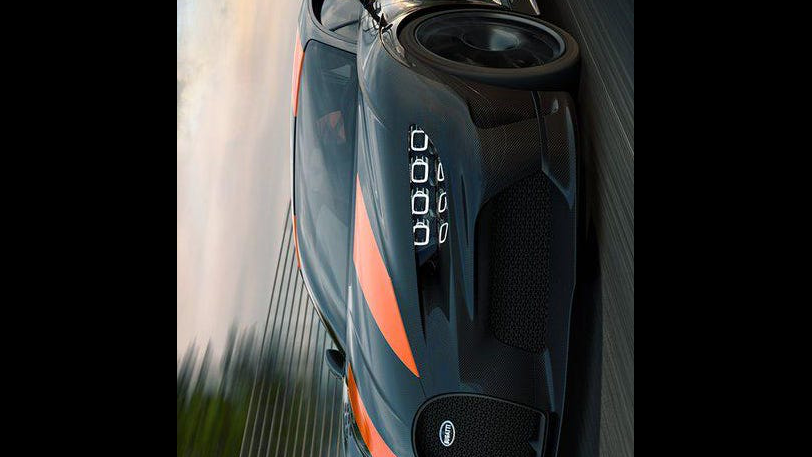

In [13]:
r1_image = img.rotate(90)  # rotating 90 degrees
r1_image

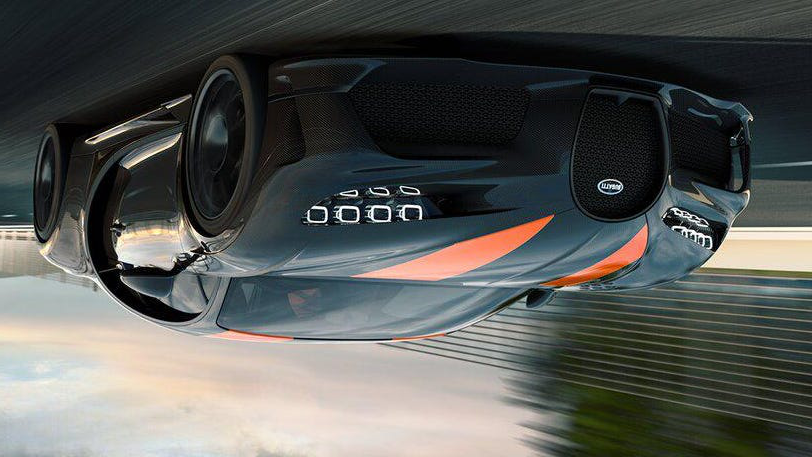

In [14]:
r2_image = img.rotate(180)
r2_image

In [15]:
# resizing
img.size

(812, 457)

In [16]:
size = (400, 250)
resized_image = img.resize(size)

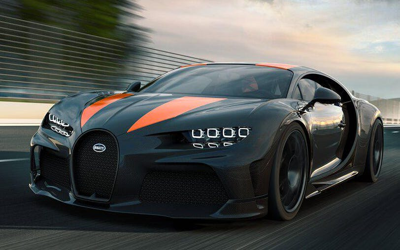

In [17]:
resized_image

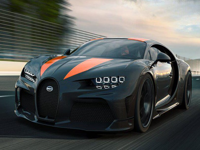

In [22]:
new_size = (200,150)
new_sized_image  = img.resize(new_size)
new_sized_image

## Cropping image

In [23]:
img.size

(812, 457)

In [25]:
width, height = img.size

In [26]:
width

812

In [27]:
height

457

In [33]:
left  = 5
top = height / 4
right = 164
bottom = 3 * height / 4

In [34]:
cropped_img = img.crop((left, top, right, bottom))

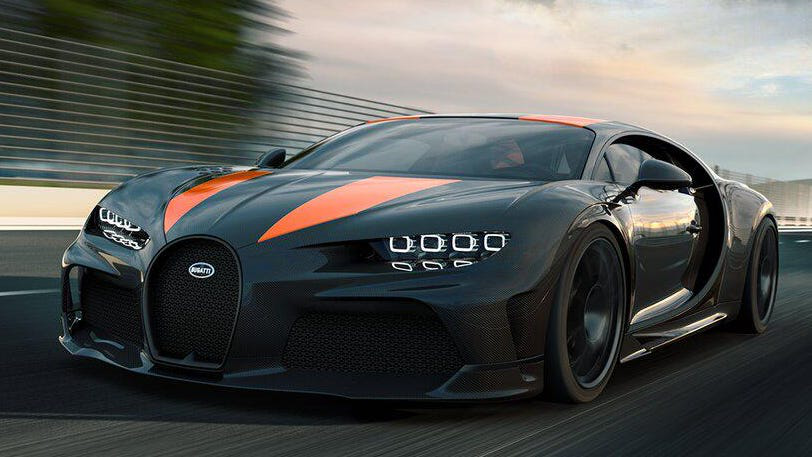

In [35]:
img

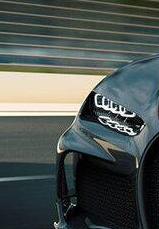

In [36]:
cropped_img

## Adding text on Image

In [37]:
from PIL import Image
from PIL import ImageDraw

In [38]:
draw = ImageDraw.Draw(img)

In [41]:
# specifing the color and coordinates of the text
draw.text((50,90), "Vrooom Vroom!", (255,255,255))

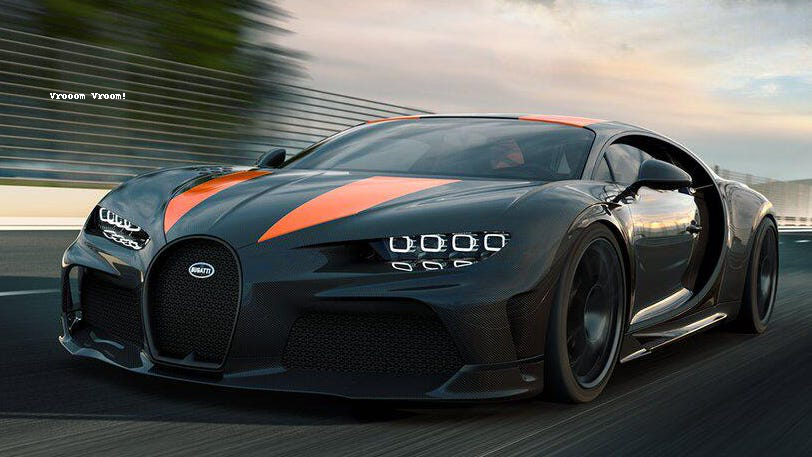

In [42]:
img

# Padding

In [43]:
right = 98
left = 105
top = 100
bottom = 100

In [45]:
img.size

(812, 457)

In [46]:
width, height = img.size

In [47]:
new_width = width + right + left
new_height = height + top + bottom

In [48]:
result = Image.new(img.mode, (new_width, new_height), (0,0,255))

In [50]:
result.paste(img, (left, top))

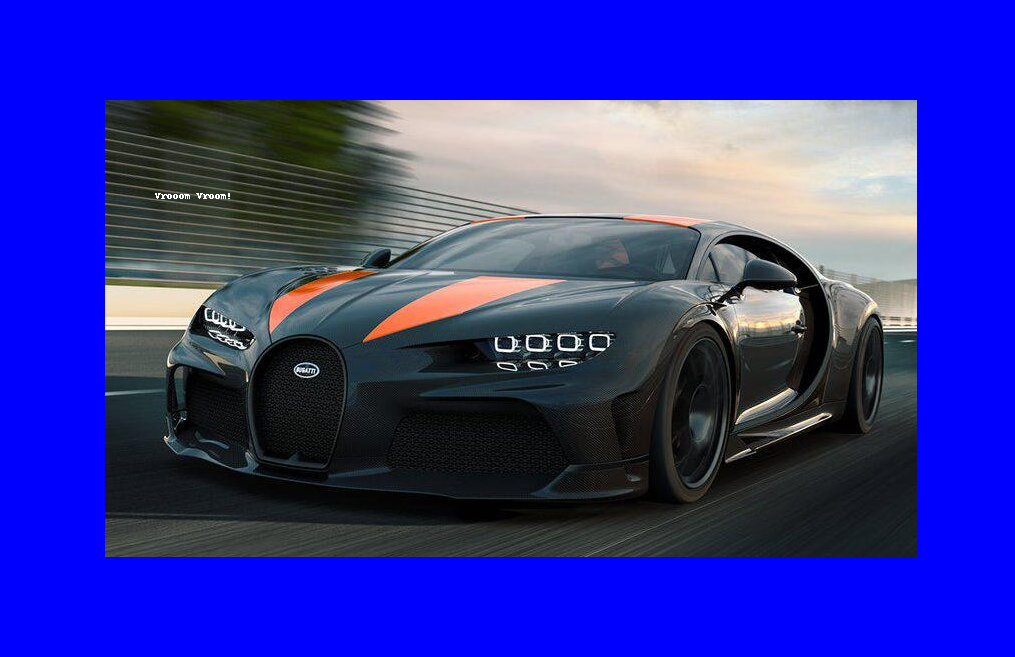

In [51]:
result

## Blur Image

In [52]:
from PIL import Image, ImageFilter

There are 3 methods to blur an image.

1. Box blur

Blurs the image by setting each pixel to the average value of pixels in the square box, extending to the radius of the pixels in each directions.

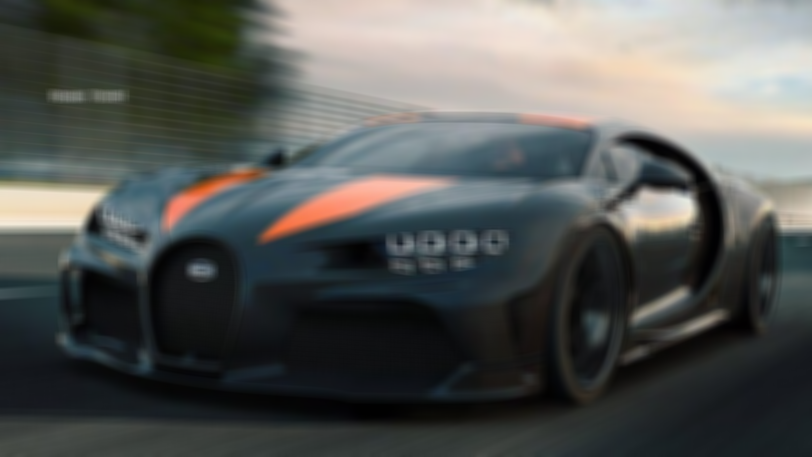

In [54]:
# giving the radius so that it can take the average of those radius number of pixels
im1 = img.filter(ImageFilter.BoxBlur(5))
im1

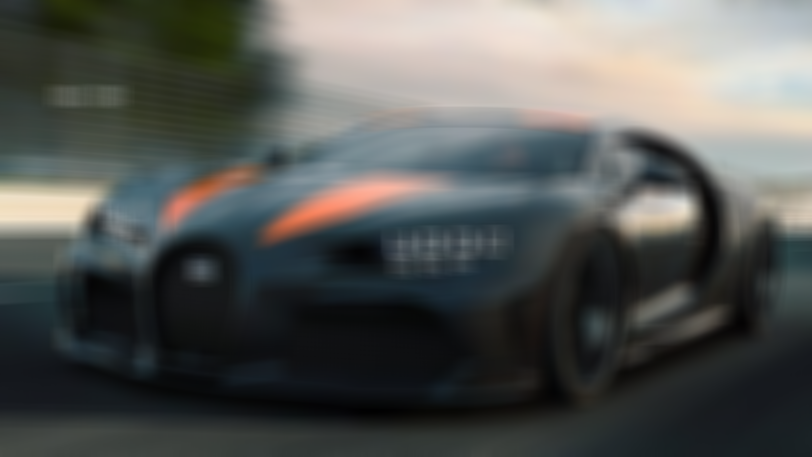

In [55]:
im2 = img.filter(ImageFilter.BoxBlur(10))
im2

2. Gaussian Blur

It creates a Gaussian blur filter which uses a radius parameter by changing the value of this radius. The intensity of the blur will change.

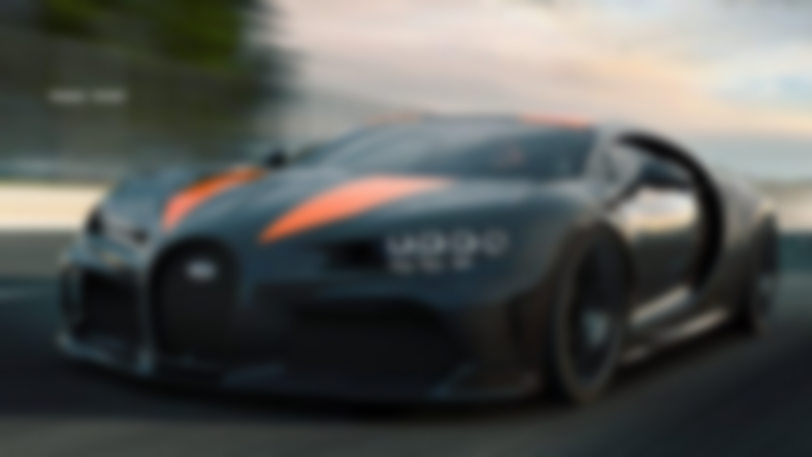

In [57]:
im3 = img.filter(ImageFilter.GaussianBlur(5))
im3

3. Simple Blur

It applies a blurring effect to the image specified through a specific kernel or a convolutional matrix inside CNN

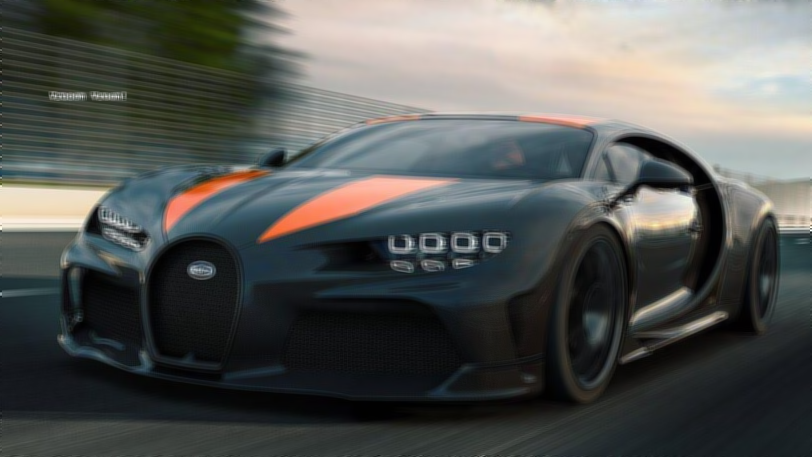

In [59]:
img4 = img.filter(ImageFilter.BLUR)
img4 # generates standard simple blur

## Concatenate Image

In [61]:
from PIL import Image
import matplotlib.pyplot as plt

There are two approaches: 
---
You can stack them horizontollay otherwise, you can stack them vertically

In [62]:
img = Image.open("testimage.jpg")
img1 = Image.open("testimage2.jpg")

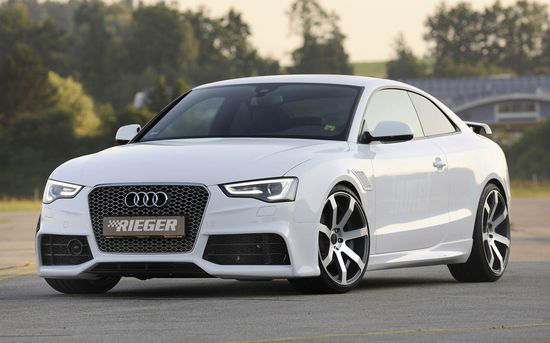

In [63]:
img1

In [64]:
img.size

(812, 457)

In [65]:
img1.size

(550, 343)

Resizing them to a common pixel size so it will be easy to set them together.

In [66]:
img_size = img.resize((250, 100))
img1_size = img1.resize((250, 100))

In [67]:
# adding 250 + 250 to stack them horizontoally
img2 = Image.new("RGB", (500, 100), "white")

In [69]:
img2.paste(img_size,(0,0))

In [70]:
img2.paste(img1_size,(250,0))

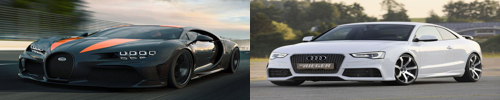

In [71]:
img2

In [72]:
# Stacking vertically
img_size = img.resize((250, 90))
img1_size = img1.resize((250, 90))

In [73]:
img2 = Image.new("RGB", (250, 180), "white")

In [74]:
img2.paste(img_size, (0,0))
img2.paste(img1_size, (0,90))

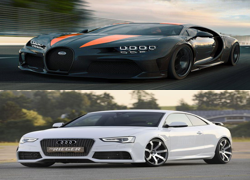

In [75]:
img2

## Saving image

In [17]:
from PIL import Image

In [77]:
img = Image.open("testimage.jpg")

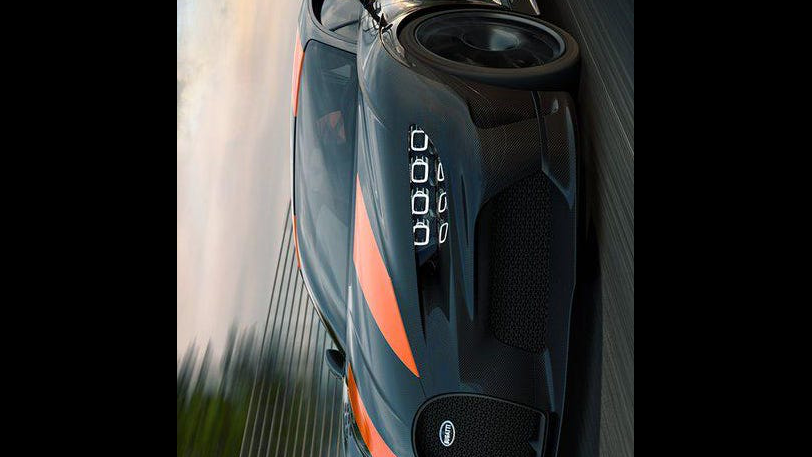

In [78]:
rot_img = img.rotate(90)
rot_img

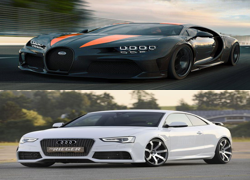

In [79]:
img2

In [80]:
img2.save("Concated.jpg")

# OpenCV Library
## Opening an image

In [83]:
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/38/d2/3e8c13ffc37ca5ebc6f382b242b44acb43eb489042e1728407ac3904e72f/opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl (38.1 MB)


In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
image_file = "test.png"

In [3]:
img = cv2.imread(image_file)

In [88]:
# img

In [4]:
type(img)

numpy.ndarray

In [5]:
# alternative method to diplay the image file
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    
    height, width = im_data.shape[:2]
    
    figsize = width / float(dpi), height / float(dpi)
    
    fig = plt.figure(figsize = figsize)
    
    ax = fig.add_axes([0,0,1,1])
    
    ax.axis('off')
    
    ax.imshow(im_data, cmap='gray')
    
    plt.show()  

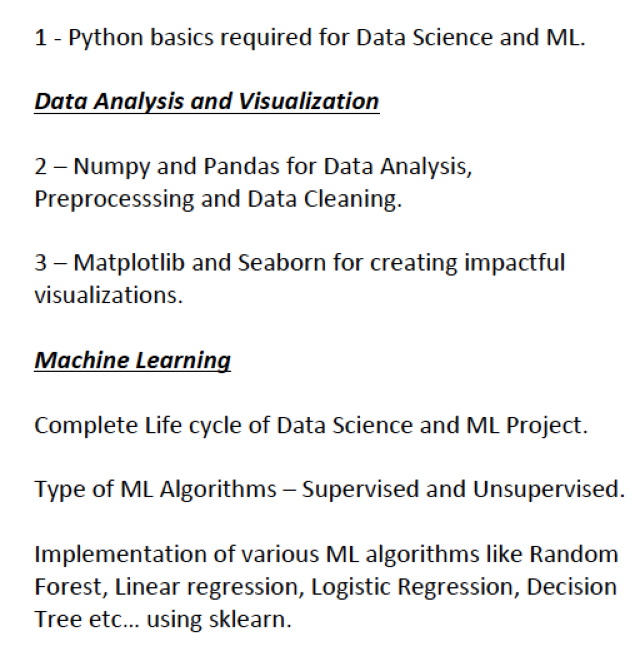

In [6]:
display(image_file)

## Inverting an image

Performing a "bitwise_not" operation on each and evry pixels. (By inverting meaning balc becomes white and the white becomes black.)

In [7]:
# here we are converting 0s to 1s and 1s to 0s
inverted_image = cv2.bitwise_not(img)

In [8]:
cv2.imwrite("inverted_image.jpg", inverted_image)

True

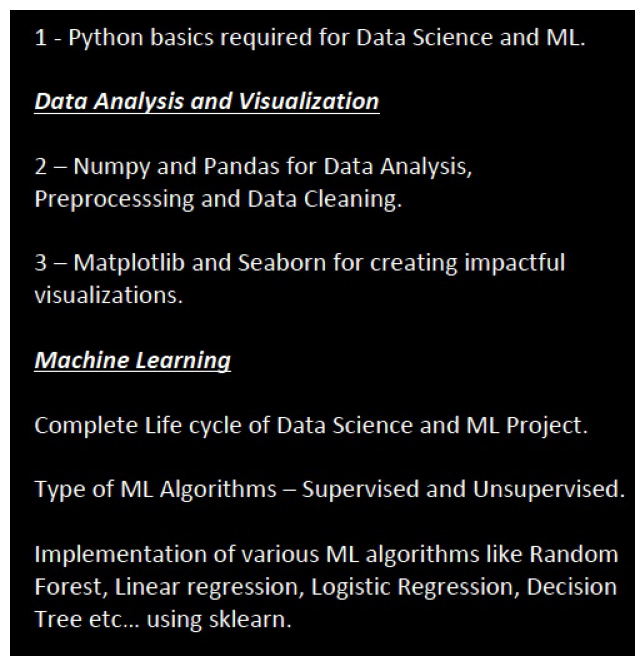

In [9]:
display("inverted_image.jpg")

## Binarization
----
It is a process of converting colored image to a black and white format.

In [10]:
image_file = "butterfly.jpg"

In [11]:
img = cv2.imread(image_file)

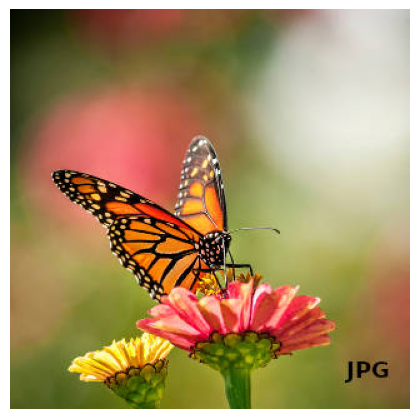

In [12]:
display(image_file)

We need to first convert it to a grayscale format, so we will just perform the intermediary step to converting into a grayscale image and then to the binarization.

In [23]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [24]:
gray_image = grayscale(img)

In [25]:
# saving the image file
cv2.imwrite("gray_img.jpg",gray_image)

True

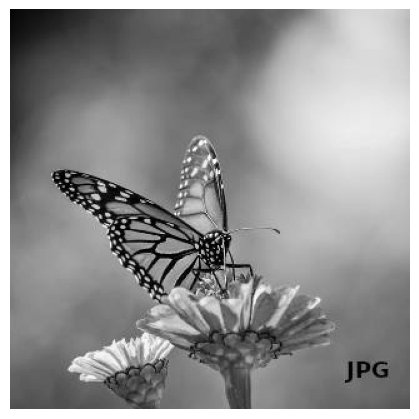

In [26]:
display("gray_img.jpg")

In [27]:
# Finally, performing binarization
thresh, im_bw = cv2.threshold(gray_image, 210, 230, cv2.THRESH_BINARY)

In [28]:
# saving the image
cv2.imwrite("binarized_img.jpg", im_bw)

True

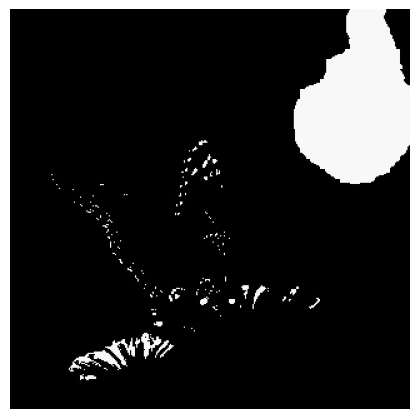

In [29]:
display("binarized_img.jpg")

## Erosion and Dilation

Its an important preprocessing step.

**Erosion** basically means you are reducing or thinning the font whereas, **dilation** means you are increasing or thickening the font size.

In [31]:
import cv2
import matplotlib.pyplot as plt

In [32]:
image_file = "test.png"

In [34]:
img = cv2.imread(image_file)

In [36]:
# alternative method to diplay the image file
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    
    height, width = im_data.shape[:2]
    
    figsize = width / float(dpi), height / float(dpi)
    
    fig = plt.figure(figsize = figsize)
    
    ax = fig.add_axes([0,0,1,1])
    
    ax.axis('off')
    
    ax.imshow(im_data, cmap='gray')
    
    plt.show()  

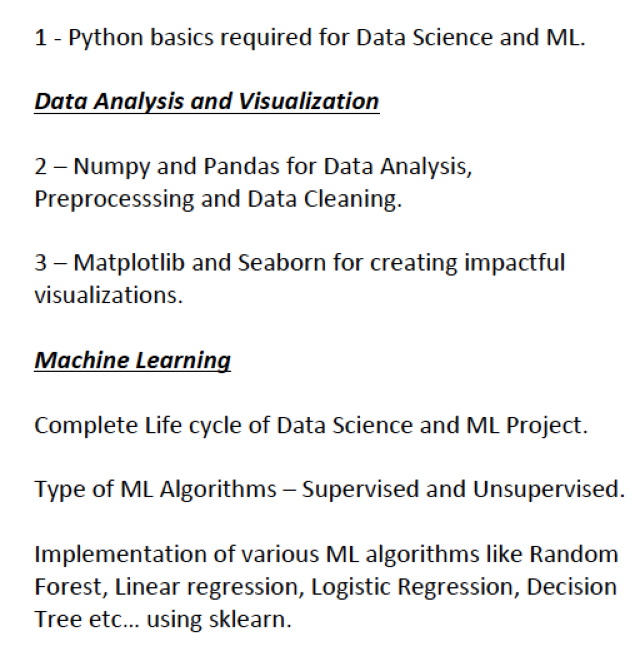

In [37]:
display(image_file)

##### Creating a function to erode/thin the font of the image

In [42]:
def thin_font(image):
    import numpy as np
    #performing bitwise_not operation becoz it works better with black background and white text
    image = cv2.bitwise_not(image) #performing bitwise_not operation
    kernel = np.ones((2,2), np.uint8)
    image = cv2.erode(image, kernel, iterations = 1) #performing erode
    image = cv2.bitwise_not(image) # re-inverting the image
    return (image)   

In [43]:
eroded_image = thin_font(img)

In [44]:
cv2.imwrite("eroded_image.jpg", eroded_image)

True

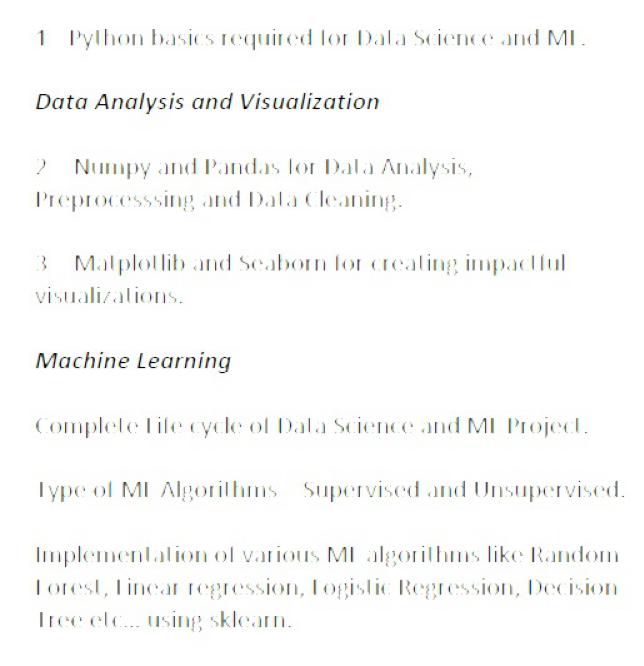

In [45]:
display("eroded_image.jpg")

##### Creating a function to dilate/thick the font of the image

In [46]:
def thick_font(image):
    import numpy as np
    #performing bitwise_not operation becoz it works better with black background and white text
    image = cv2.bitwise_not(image) #performing bitwise_not operation
    kernel = np.ones((2,2), np.uint8)
    image = cv2.dilate(image, kernel, iterations = 1) #performing dilation
    image = cv2.bitwise_not(image) # re-inverting the image
    return (image)   

In [47]:
dilated_image = thick_font(img)

In [48]:
cv2.imwrite("dilated_image.jpg", dilated_image)

True

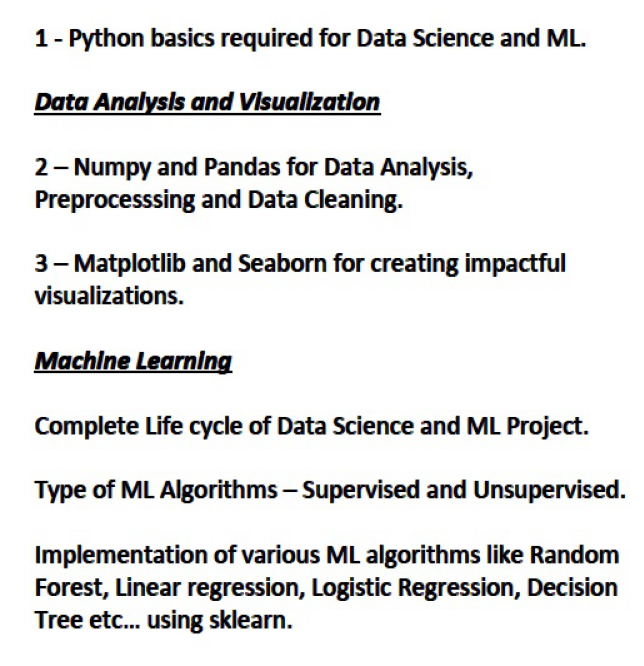

In [50]:
display("dilated_image.jpg")

# PyTesseract

## Image to Text

In [53]:
!pip install pytesseract

  Using cached pytesseract-0.3.10-py3-none-any.whl (14 kB)


In [54]:
import pytesseract
from PIL import Image

In [55]:
img = Image.open("test.png")

In [57]:
# img

**Image to String**

This method takes the image as an argument and extract the text that is present inside the image and return it.

In [59]:
text = pytesseract.image_to_string(img)

In [62]:
text

'1 - Python basics required for Data Science and ML.\n\nData Analysis and Visualization\n\n2—Numpy and Pandas for Data Analysis,\nPreprocesssing and Data Cleaning.\n\n3 —Matplotlib and Seaborn for creating impactful\nvisualizations.\n\nMachine Learning\n\nComplete Life cycle of Data Science and ML Project.\nType of ML Algorithms — Supervised and Unsupervised.\nImplementation of various ML algorithms like Random\n\nForest, Linear regression, Logistic Regression, Decision\nTree etc... using sklearn.\n\x0c'

## Getting boxes around text

In [63]:
import cv2
import pytesseract
from pytesseract import Output

In [69]:
img = cv2.imread("test2.png") #loading the image

In [65]:
#just to see the image
from PIL import Image

In [67]:
img1 = Image.open("test2.png")

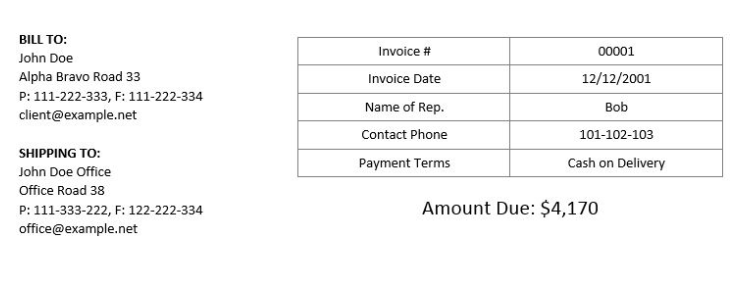

In [68]:
img1

Lets extarct different words and build bounding box around them.

In [73]:
# evetually we will want the output type as dictionary which is a more organized out put
d = pytesseract.image_to_data(img)
#d

In [76]:
d = pytesseract.image_to_data(img, output_type=Output.DICT)
# d

In [78]:
d.keys()

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])

Building boxes around them

In [80]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x,y,w,h) = (d['left'][i],
                     d['top'][i], 
                     d['width'][i],
                    d['height'][i])
        img = cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)

-1

## Text Template Matching